# Part II - Communicate Data Findings: Ford Go-Bike Data Set
## by Tae Singhanart

## Investigation Overview

The main feature I'm interested in this data set is user type, customer and subscriber. The finding demonstrate the different and commonality relationship with other features such as the duration of the ride, gender, and age.


## Dataset Overview

Originally, there were 183,412 entries with 16 features in this dataset. I retreived the dataset from [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) . I wrangled it by checking the remove null value, changing the datatypes, changing the time format of the second to minute, dropping the 'other' value in gender, and recalculating the age from the member's birth year. Also, I removed the age outlier. 



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata-clean.csv')

In [3]:
#Define function for count plot with seaborn

def countplot(df,xVar,hue=None, color=0,palette=None, order=None, hue_order =None):
    '''
    This function generate the plot with formatted title
    
    input: df, xVar (value to plot). These two are neccessary hue, color, palette, order and hue_order are optional
    output: The plot
    '''
    
    #set plot dimensions
    plt.figure(figsize = [14,6])
    
    #plot
    sb.countplot(data = df, x = xVar, hue=hue, color= sb.color_palette()[color], palette=palette, order = order, edgecolor='black', linewidth=2,hue_order=hue_order);
    
    #optional: after plotting, clean up variable names
    xVar = xVar.replace("_"," ") # replace _ with space
    if hue:
        hue = hue.replace("_"," ")
    
    #add title and format it
    plt.title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title(), fontsize=14, weight = 'bold')
    
    #add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight ='bold')
    
    #add y label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight ='bold')
    

## (Visualization 1)

In this dataset, there are 155,000 subscribers and 16,105 customers. The subscriber is more much than the customer type around 9.6 fold. 

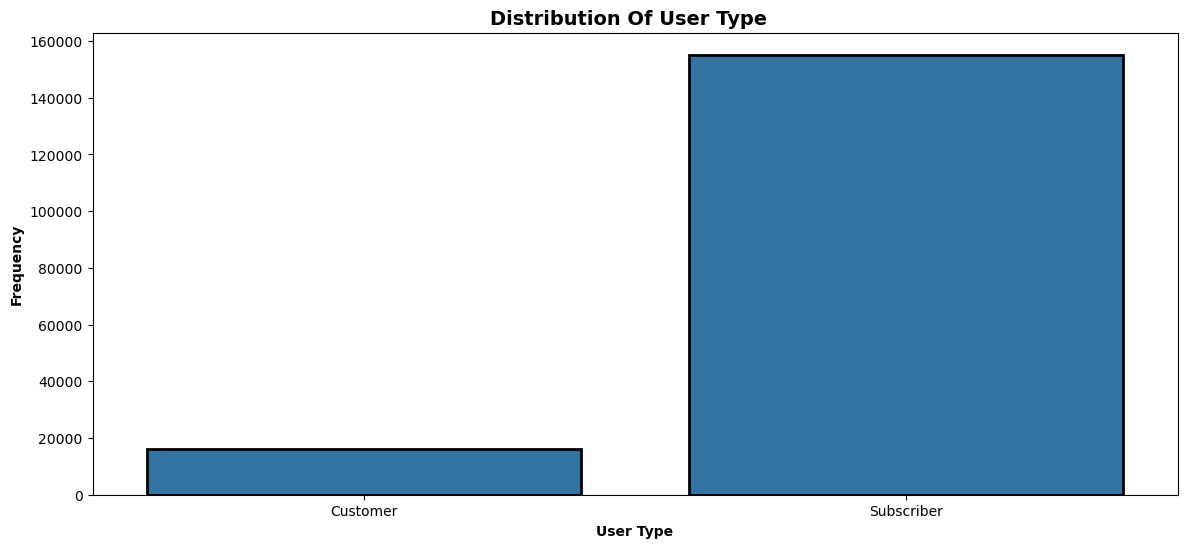

In [4]:
countplot(df,'user_type')

## (Visualization 2)

It is very interesting to see that the age profile of customer and subscriber group is quite simliar. The spread of the IQR of subscriber seems to a bit more than customer group

In [5]:
# Remove outlier which is more than 80 year old
df =  df[df['age'] < 80 ]

Text(0.5, 1.0, 'Age of each User Type')

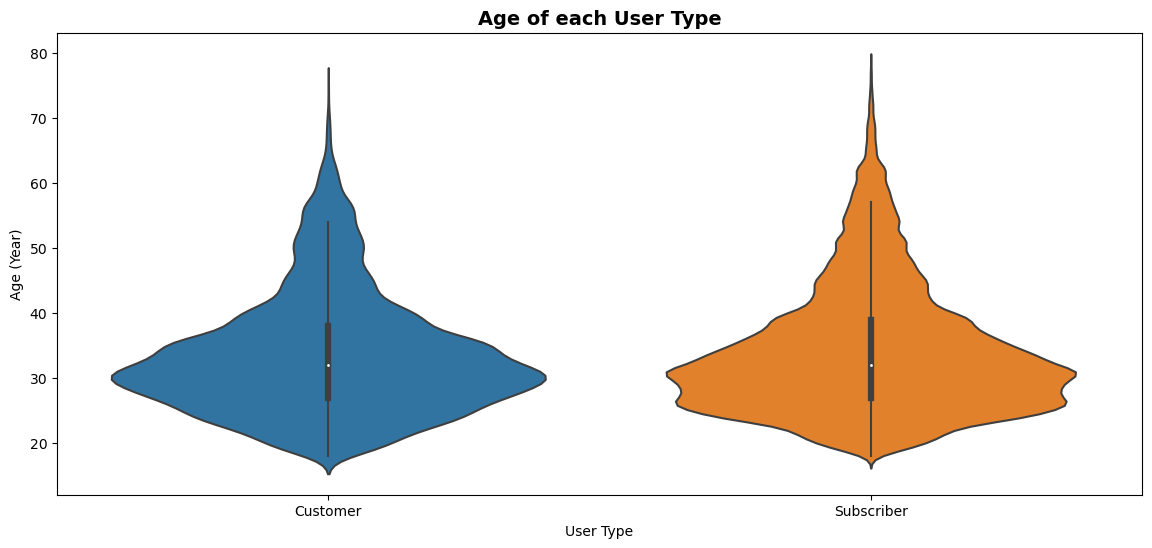

In [6]:
plt.figure(figsize =[14,6])
sb.violinplot(x= df['user_type'], y = df['age']);
plt.ylabel('Age (Year)')
plt.xlabel('User Type')
plt.title('Age of each User Type',fontsize=14, weight = 'bold')

## (Visualization 3)

There are more male member in both group. Noticably, The number of male subscriber, 118,857, are far way more than the other group such as around 3 folds of female subscriber and around 23 folds of female in customer group.

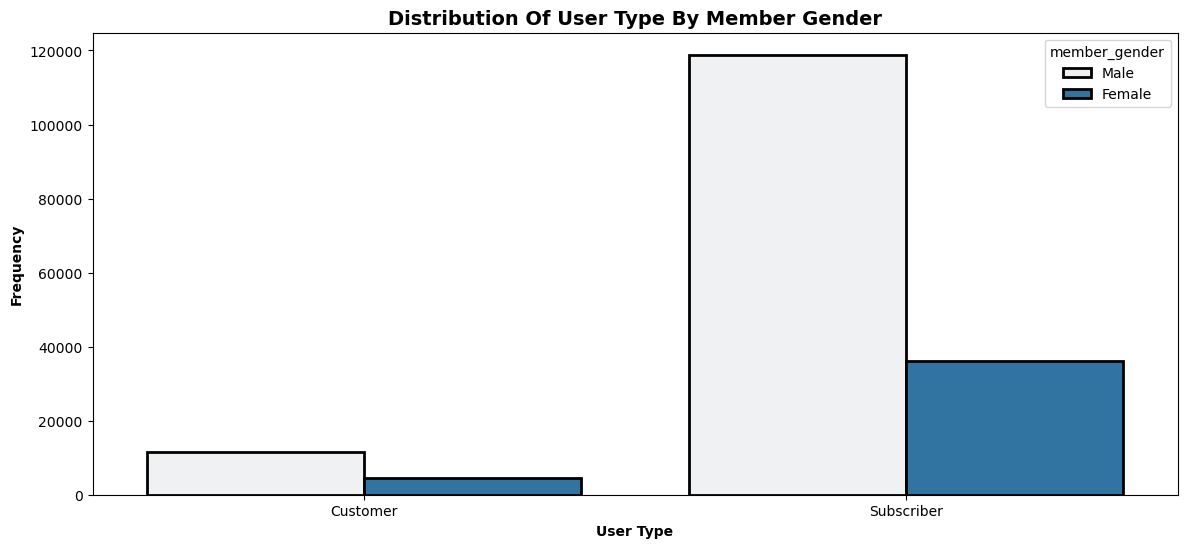

In [7]:
countplot(df,'user_type', hue='member_gender')

## (Visualization 4)

The customer group seem to have longer duration ride than subscriber. Interestingly to see the 75% percentile of subscriber group is nearly in the same level of the median duration of the customer group.

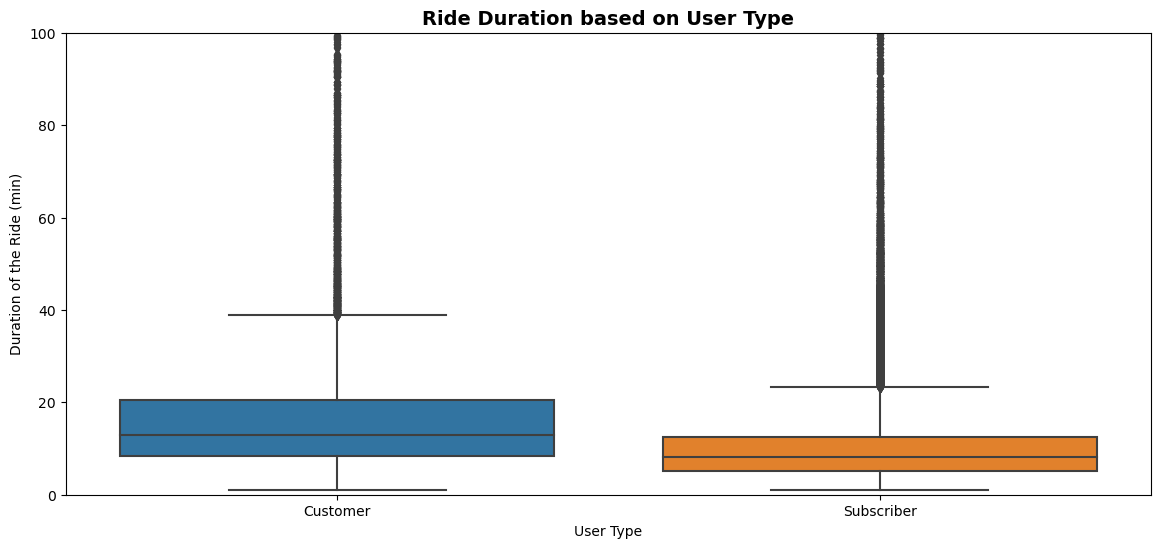

In [8]:
plt.figure(figsize =[14,6])
sb.boxplot(x= df['user_type'], y = df['duration_min']);
plt.ylim([0,100])
plt.ylabel('Duration of the Ride (min)')
plt.xlabel('User Type')
plt.title('Ride Duration based on User Type',fontsize=14, weight = 'bold');

## (Visualization 5)

For both customer and subscriber group, most ride take around 1 - 40 minutes. However, It's also shown that the member after 60 year olds who taking the trip from 1-40 minutes are mostly customer than subscriber. (The plot exclude the 1% outlier for the clearer plotting)

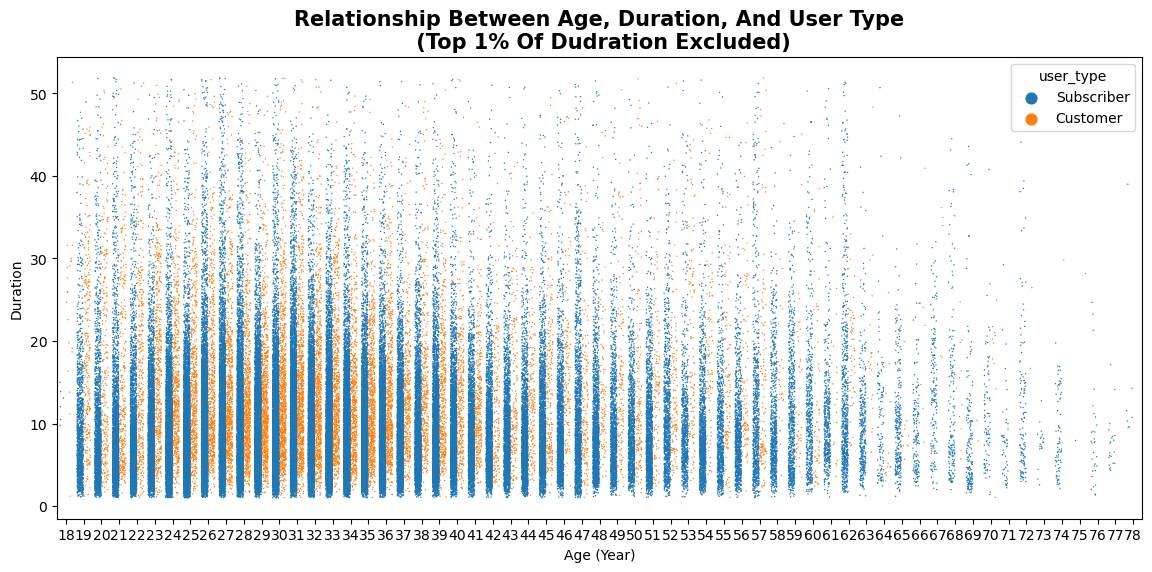

In [9]:
one_percent_exclude = df.query("duration_min < duration_min.quantile(0.99)")

plt.figure(figsize=[14,6])
sb.stripplot(data = one_percent_exclude, x = 'age', y='duration_min', hue='user_type', size = 1 , hue_order = None, order = None, jitter =0.35, dodge= True)
plt.title('Relationship between age, duration, and user type\n (Top 1% of dudration excluded)'. title(), fontsize = 15, fontweight = 'bold')
plt.xlabel('age (year)'.title())
plt.ylabel(('Duration'.title()))
plt.show();

## (Visualization 6)

It's very interesting to see that in each top three place, the majority group of visitor is different between subscriber and customer. For example, Market St at 10 St, the subscriber with the below 20 and mids 20 are the most group riding to this place while the customer group is the age over 30. 

In marketing perspective, this information help the company gain a huge advantage when it come to lauching the promotion on site or select target group for some specific promotion.

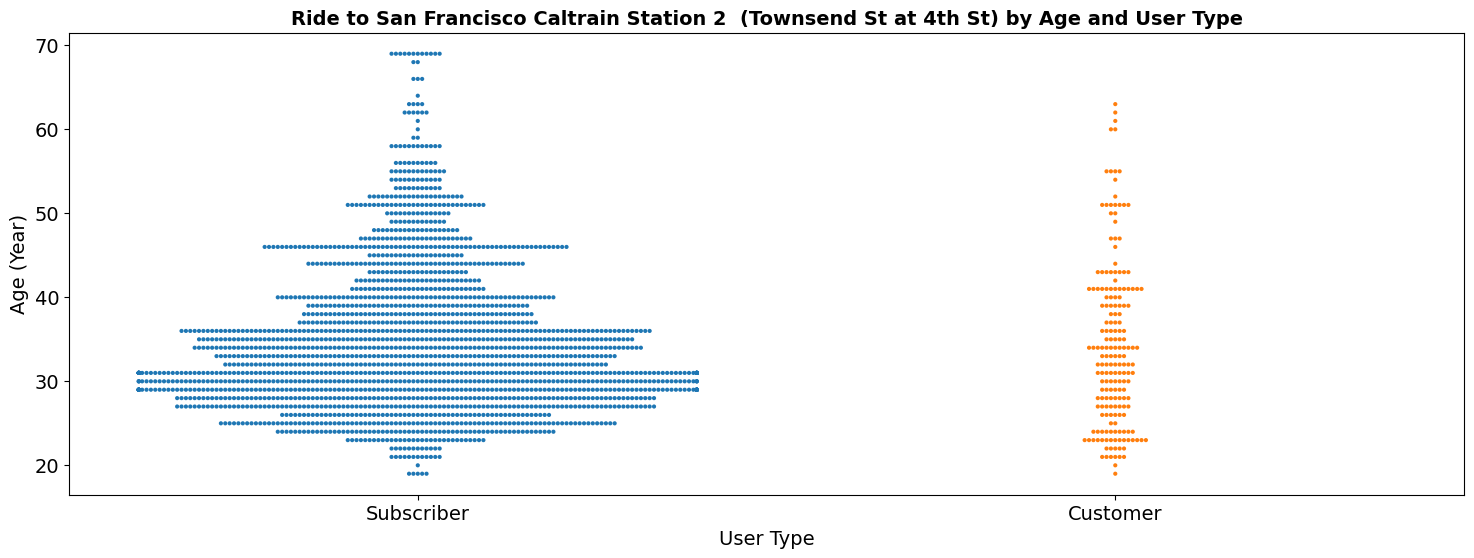

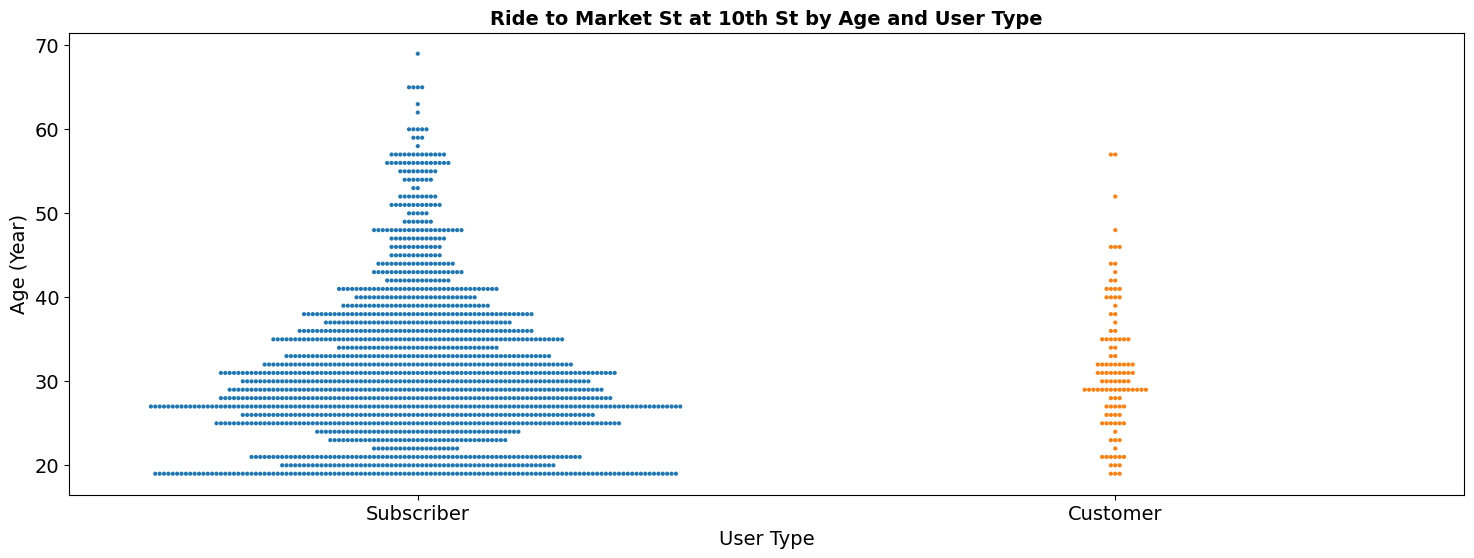

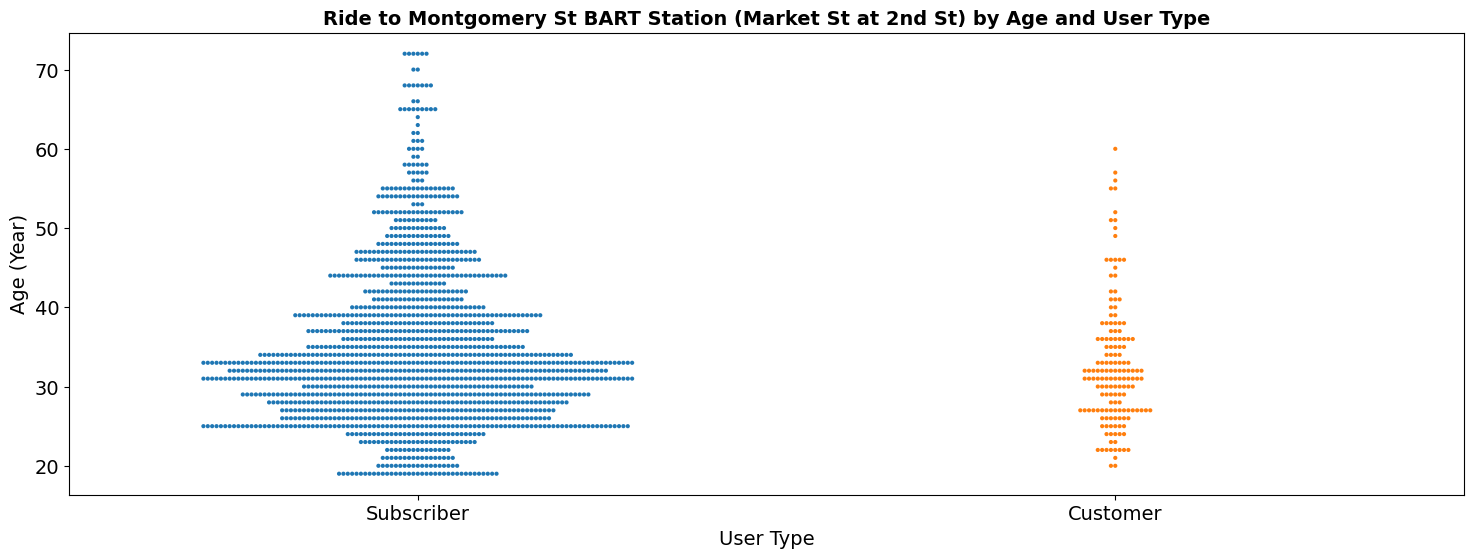

In [10]:
top_five_des = df.end_station_name.value_counts().head()

for i in range (3):
    #subsetting df
    df_top =  df[df['end_station_name'] == top_five_des.index[i]]
    #to reduce computational, I will sample out of the dataset by half
    df_top_sample = df_top.sample(int((df_top.shape[0])*0.5), random_state=42)
    #plot swarmplot
    plt.figure(figsize =[18, 6])
    sb.swarmplot(x= df_top_sample['user_type'], y = df_top_sample['age'], size = 3)
    plt.ylabel('Age (Year)', size = 14)
    plt.xlabel('User Type', size = 14)
    plt.yticks(size = 14)
    plt.xticks(size = 14)
    plt.title('Ride to ' + str(top_five_des.index[i]) + ' by Age and User Type', fontsize=14, weight = 'bold');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 